In [1]:
import numpy as np
import random

    
        
        
        
class Kmeans():
    
    
    
    
    
    def  __init__(self , K :int , iterations:int , tolerance:float):
        
        self.K = K
        
        self.max_iterations = iterations
    
    
        self.clusters = [[] for _ in range(self.K)]
    
         
        
        self.centroids = []
    
        self.tolerance = tolerance
    
    
    
    
    def distance(self,point1,point2):
    
        try :
        
            distance = float(0)
        
            for i in range(len(point1)) :
                distance += (point1[i] -point2[i])**2
        
            return np.sqrt(distance)
    
        except :
        
            print("Something went wrong")
        
        
        
    def centroids_initialization(self, X: np.ndarray ):
        
        
        
        
        centroids = np.zeros((self.K,self.n_features))
        
        
        
        random_indexes = random.sample(list(np.arange(self.n_samples)), self.K)# return randomly the indexes
        
        centroids = X[random_indexes]
        
        
        return centroids  
    
    
    
    
    def closest_centroid(self, sample : np.ndarray , centroids  : np.ndarray ) :
        
        distances = [ self.distance(sample,centroid) for  centroid in centroids ]
        
        closest_index = np.argmin(distances)
        
        return closest_index
    
    
    
    
    def make_clusters(self , centroids:np.ndarray):
        
        
        clusters = [[] for _ in range(self.K)]
        
        
        for index , sample in enumerate(self.X):
            
            closest_index  = self.closest_centroid(sample,centroids)
            
            clusters[closest_index].append(index)
            
        return clusters
    
    
    
    
    def new_centroids(self, clusters:list):
    
        centroids = np.zeros((self.K,self.n_features))
        
        for cluster_index, cluster in enumerate(clusters):
                
            new_centroid = np.mean(self.X[cluster], axis=0)
            
            centroids[cluster_index] = new_centroid
            
        return centroids
    
    
    def stop_Kmeans(self,tolerance,centroids_old,centroids_current):
        
        
        
        
        if np.sum(((centroids_old-centroids_current)/centroids_old)) < self.tolerance:
            
            return True
    
    
    
        
    def fit (self, X : np.ndarray )  :
        
        self.X = X
        
        self.n_samples , self.n_features = X.shape
        
        self.centroids    =  self.centroids_initialization(X)
        
        
        i = 0
        
        cen =list()
        
        for _ in range(self.max_iterations):
            
            
            
            self.clusters = self.make_clusters(self.centroids)
            
            centroids_old = self.centroids
            
            cen.append(centroids_old)
            
            self.centroids = self.new_centroids(self.clusters)
            
            
            
            if self.stop_Kmeans(self.tolerance , centroids_old , self.centroids) :
                
                break
                
        return self.clusters   
    
    
    
    
    
    def get_clusters(self):
    
        return self.clusters
    
    
    
    
    
    def get_centroids(self):
    
        return self.centroids
     
    
                
        
        
        
    def predict(self):
        
        
        predictions  = np.zeros(self.n_samples)
        
        
        for cluster_index, cluster in enumerate(self.clusters):
        
            for index in cluster:
                predictions[index] = cluster_index
            
                
                
                
        return predictions
        
        


In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt

iris_X , iris_y = datasets.load_iris(return_X_y = True)



kmean = Kmeans(3,100,0.01)


clusters  =kmean.fit(iris_X)


predictions = kmean.predict()



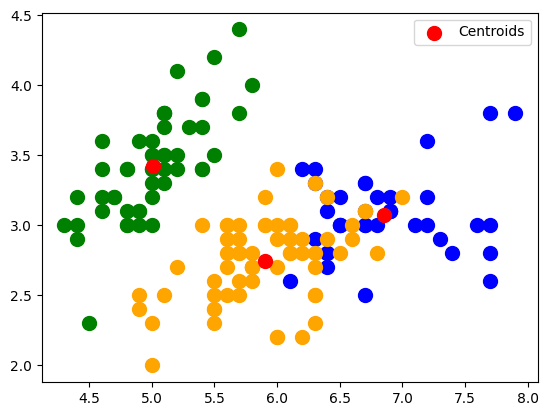

In [3]:
plt.scatter(iris_X[predictions == 0, 0], iris_X[predictions == 0, 1], s = 100, c = 'blue')
plt.scatter(iris_X[predictions == 1, 0], iris_X[predictions == 1, 1], s = 100, c = 'orange')
plt.scatter(iris_X[predictions == 2, 0], iris_X[predictions == 2, 1], s = 100, c = 'green')


plt.scatter(kmean.get_centroids()[:, 0], kmean.get_centroids()[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

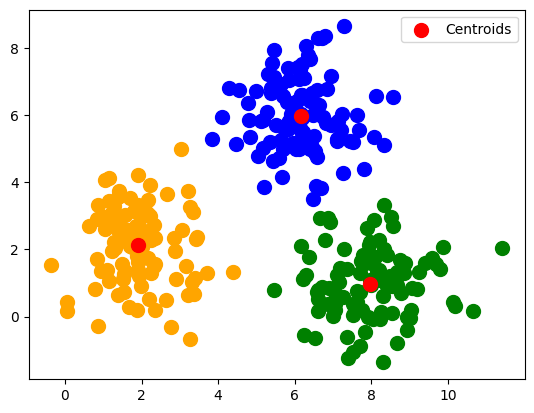

In [4]:
def main():
    
    
    
    K=3
    center_1 = np.array([2,2])
    center_2 = np.array([6,6])
    center_3 = np.array([8,1])

    # Generate random data and center it to the three centers
    cluster_1 = np.random.randn(100, 2) + center_1
    cluster_2 = np.random.randn(100,2) + center_2
    cluster_3 = np.random.randn(100,2) + center_3
    

    data = np.concatenate((cluster_1, cluster_2, cluster_3), axis = 0)
    
    k_means1 = Kmeans(3,300,0.0001)
    
    clusters   =  k_means1.fit(data)
    
    predictions1 = k_means1.predict()
     
    plt.scatter(data[predictions1 == 0, 0], data[predictions1 == 0, 1], s = 100, c = 'blue')
    plt.scatter(data[predictions1 == 1, 0], data[predictions1 == 1, 1], s = 100, c = 'orange')
    plt.scatter(data[predictions1 == 2, 0], data[predictions1 == 2, 1], s = 100, c = 'green')

   
    plt.scatter(k_means1.get_centroids()[:, 0], k_means1.get_centroids()[:,1], s = 100, c = 'red', label = 'Centroids')

    plt.legend()
    
    
if __name__ == "__main__":
    main()
            